In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(2, 1.5, 1)

0.9820137900379085

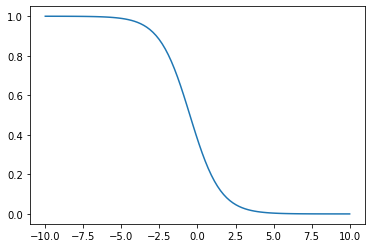

In [4]:
w = -1.0   
b = -0.5
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

sigmoid_2d(1, 1, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 100, 100)
X2 = np.linspace(-10, 100, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


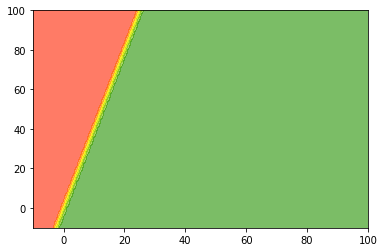

In [8]:
w1 = 2
w2 = -0.5
b  = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

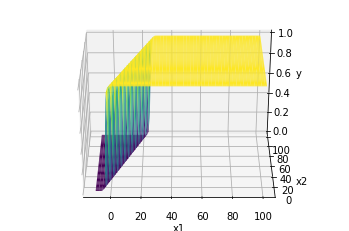

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)

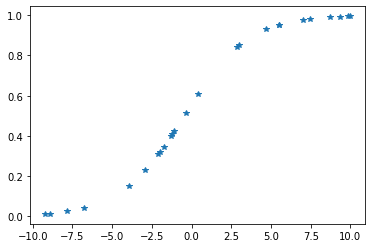

In [10]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

plt.plot(X, Y, '*')
plt.show()

In [11]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss
  
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)
WW.shape


(101, 101)

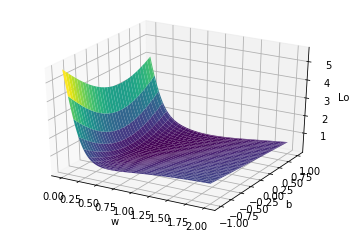

In [12]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 300)

In [13]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [14]:
print(i, j)

62 25


In [15]:
print(WW[i, j], BB[i, j])

0.5 0.24


In [16]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [17]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?epoch/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.76906465 -0.14207581]] [-0.00628655]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.81871882 -0.39584529]] [-0.06984912]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 0.99088635 -0.20993908]] [-0.11832025]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.0049499  -0.43653579]] [-0.17619577]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.13356873 -0.29473889]] [-0.21804473]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.15224882 -0.4365215 ]] [-0.26519244]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.23412084 -0.37357439]] [-0.30047914]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.26608168 -0.434019  ]] [-0.33675135]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.31721604 -0.42618989]] [-0.36732858]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.35407526 -0.44781799]] [-0.3966805]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.39213351 -0.45690922]] [-0.42341949]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.42638815 -0.46882101]] [-0.44845615]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.45875735 -0.47911516]] [-0.47180277]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.48911177 -0.4889508 ]] [-0.49368649]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.5177346  -0.49820017]] [-0.51425195]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.54479736 -0.5069477 ]] [-0.53363298]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.57045544 -0.51524127]] [-0.5519445]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.59484201 -0.52312408]] [-0.5692867]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.61807257 -0.53063353]] [-0.58574722]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.64024794 -0.53780225]] [-0.60140304]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.66145654 -0.54465886]] [-0.61632208]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.68177636 -0.55122858]] [-0.63056448]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.70127651 -0.55753377]] [-0.64418371]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.7200185  -0.56359432]] [-0.65722744]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.73805727 -0.56942799]] [-0.66973838]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.75544215 -0.57505072]] [-0.68175485]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.7722175  -0.58047684]] [-0.69331139]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.78842342 -0.58571932]] [-0.70443921]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.80409625 -0.59078988]] [-0.71516657]


  0%|          | 0/1 [00:00<?, ?epoch/s]

[[ 1.81926899 -0.59569919]] [-0.72551917]


  0%|          | 0/1 [00:00<?, ?epoch/s]

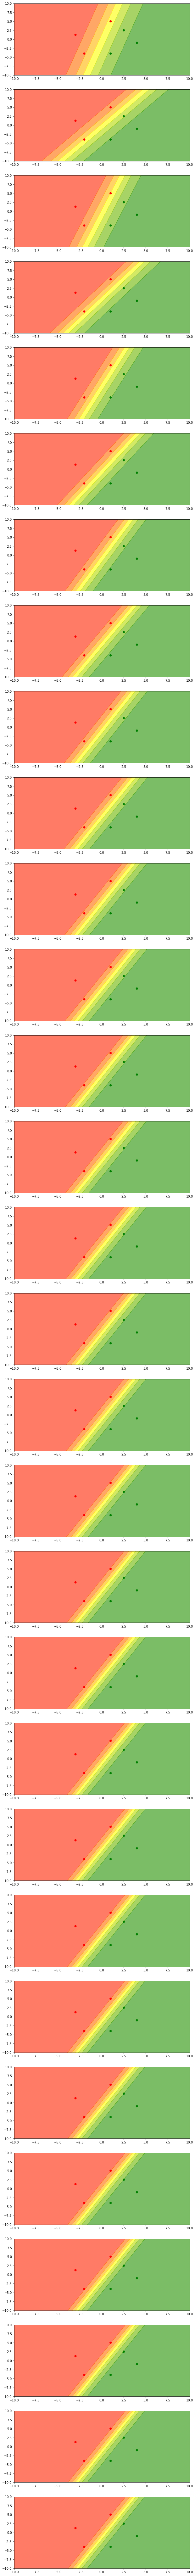

In [18]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

  
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)